# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import *
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from tabulate import tabulate
import glob
import os
import feyn
ql = feyn.QLattice()

This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


# Import data

In [2]:
path = 'CRC/'
df = pd.read_csv(path + "/all_data.csv")
#df = pd.read_csv(path + "P003.MArumugam.Data.AT-CRC_species.csv")

In [3]:
# df = df.reset_index()
# df = df.set_index("index")

In [4]:
lbl=LabelEncoder()
df['condition'] = lbl.fit_transform(df['condition'])

In [5]:
groups = df["Country"].to_numpy()
X = df.drop(["Unnamed: 0", "Country"], axis=1)
#X = df.drop(["condition"], axis=1)
y = df["condition"].to_numpy()

In [6]:
X

,condition,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000083,0.000083
1,1,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,...,0.000000,0.000000,0.000000,0.000788,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,1,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,...,0.000000,0.000000,0.000194,0.000065,0.000000,0.000840,0.0,0.0,0.001808,0.000000
3,1,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,1,0.000086,0.019236,0.001111,0.000256,0.000086,0.000086,0.000000,0.000000,0.000513,...,0.000000,0.000171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0.000000,0.000118,0.000000,0.000000,0.000059,0.000000,0.000118,0.000000,0.000059,...,0.002590,0.000000,0.000000,0.001118,0.000000,0.000000,0.0,0.0,0.000000,0.000000
764,0,0.000038,0.000038,0.000000,0.000000,0.000000,0.000000,0.000075,0.000038,0.000113,...,0.000151,0.000000,0.000000,0.000151,0.000038,0.000000,0.0,0.0,0.000000,0.000000
765,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000348,0.000044,0.001741,0.000000,0.000435,0.0,0.0,0.000000,0.000044
766,0,0.000000,0.000312,0.000000,0.000000,0.000208,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.0,0.0,0.000000,0.000156


## Dataset names

In [7]:
# some hyper parameters
SEED = 123
test_train_split_SEED = 123
# FOLDS = 10
show_fold_stats = True
VERBOSE = 0
FOLDS = 5

https://github.com/garudlab/Microbiome_PCA_Correction/blob/main/RF_Classifier/classifier.py

In [8]:
unique_groups = list(np.unique(groups))
unique_groups

['AT-CRC_species',
 'CN-CRC_species',
 'DE-CRC_species',
 'FR-CRC_species',
 'IT-CRC-2_species',
 'IT-CRC_species',
 'JP-CRC_species',
 'US-CRC_species']

In [9]:
df.Country[df.Country == 'AT-CRC_species'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
           dtype='int64', length=109)

In [10]:
AUC_scores = pd.DataFrame(index=unique_groups, columns=unique_groups)
AUC_scores

,AT-CRC_species,CN-CRC_species,DE-CRC_species,FR-CRC_species,IT-CRC-2_species,IT-CRC_species,JP-CRC_species,US-CRC_species
AT-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CN-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FR-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-CRC-2_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US-CRC_species,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ROC_curve = pd.DataFrame(index=unique_groups, columns=["fpr","tpr","auc"])
ROC_curve

,fpr,tpr,auc
AT-CRC_species,NaN,NaN,NaN
CN-CRC_species,NaN,NaN,NaN
DE-CRC_species,NaN,NaN,NaN
FR-CRC_species,NaN,NaN,NaN
IT-CRC-2_species,NaN,NaN,NaN
IT-CRC_species,NaN,NaN,NaN
JP-CRC_species,NaN,NaN,NaN
US-CRC_species,NaN,NaN,NaN


In [12]:
X

,condition,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000083,0.000083
1,1,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,0.002102,...,0.000000,0.000000,0.000000,0.000788,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,1,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,0.012013,...,0.000000,0.000000,0.000194,0.000065,0.000000,0.000840,0.0,0.0,0.001808,0.000000
3,1,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,0.000142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,1,0.000086,0.019236,0.001111,0.000256,0.000086,0.000086,0.000000,0.000000,0.000513,...,0.000000,0.000171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0.000000,0.000118,0.000000,0.000000,0.000059,0.000000,0.000118,0.000000,0.000059,...,0.002590,0.000000,0.000000,0.001118,0.000000,0.000000,0.0,0.0,0.000000,0.000000
764,0,0.000038,0.000038,0.000000,0.000000,0.000000,0.000000,0.000075,0.000038,0.000113,...,0.000151,0.000000,0.000000,0.000151,0.000038,0.000000,0.0,0.0,0.000000,0.000000
765,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000348,0.000044,0.001741,0.000000,0.000435,0.0,0.0,0.000000,0.000044
766,0,0.000000,0.000312,0.000000,0.000000,0.000208,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.0,0.0,0.000000,0.000156


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Group : 8 US-CRC_species
ROC AUC score for RandomForest model, LOGO test set: 0.7191
None
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


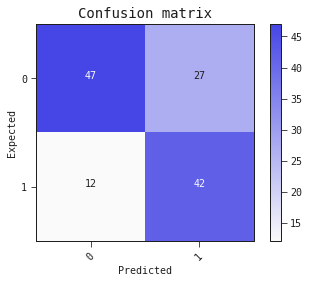

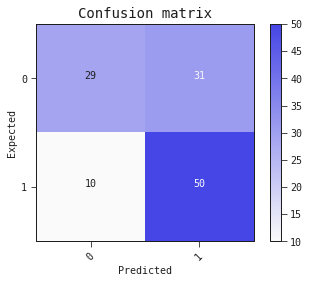

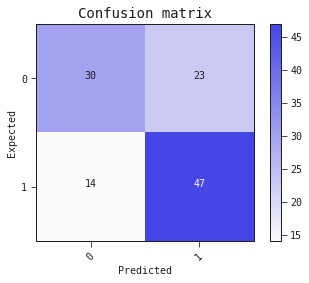

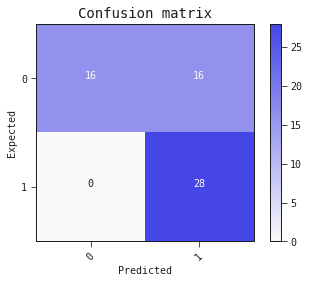

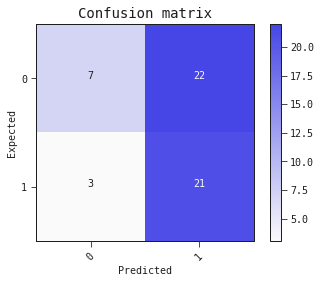

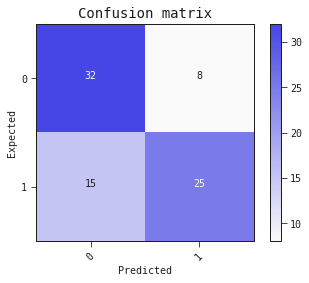

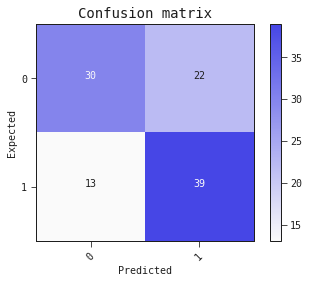

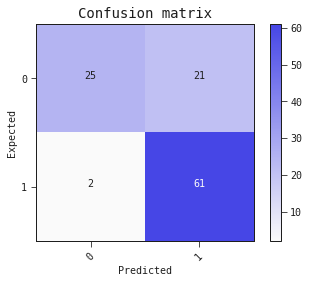

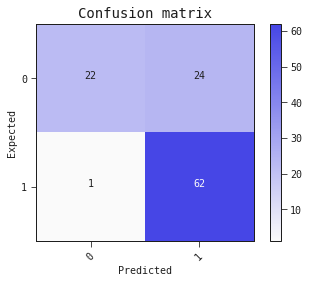

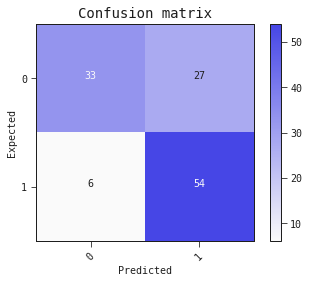

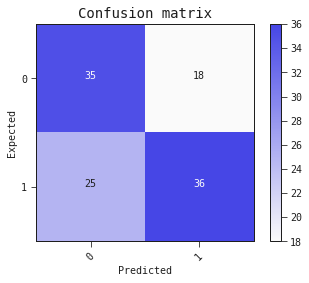

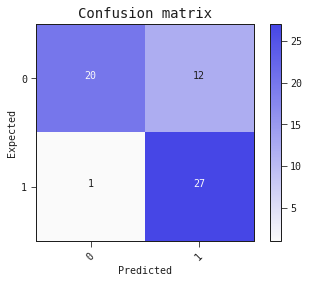

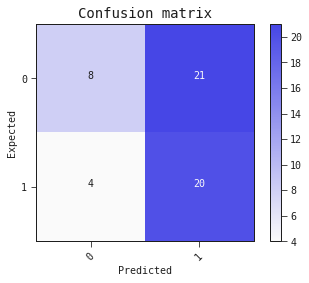

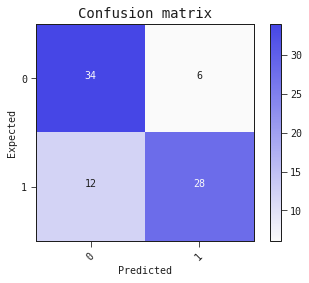

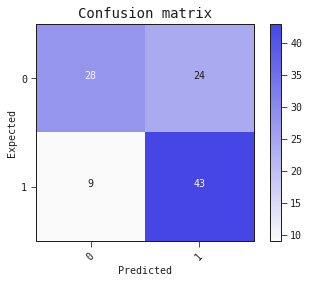

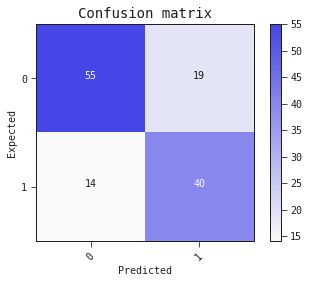

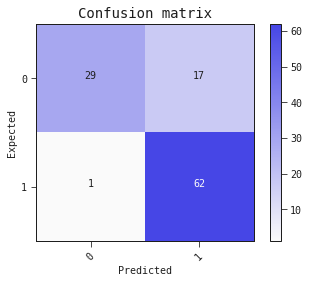

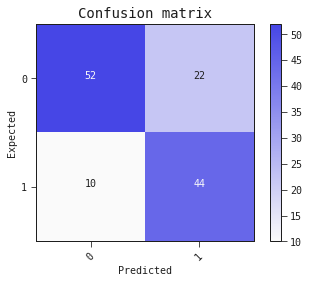

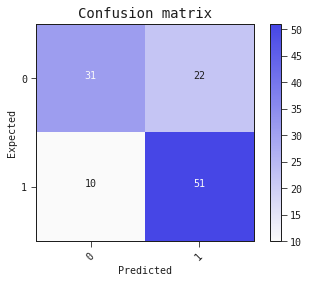

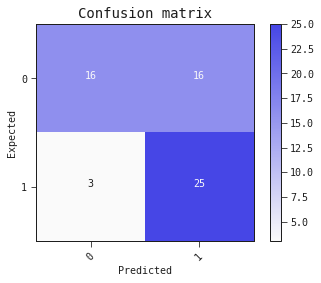

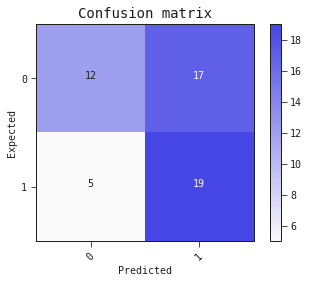

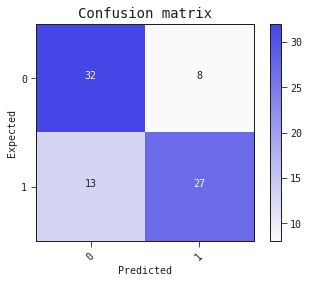

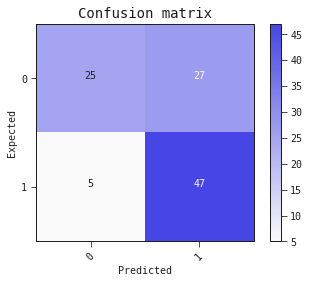

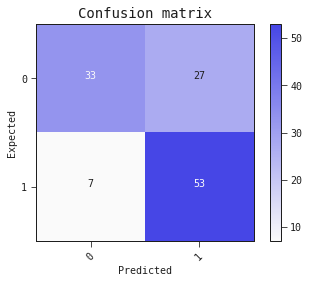

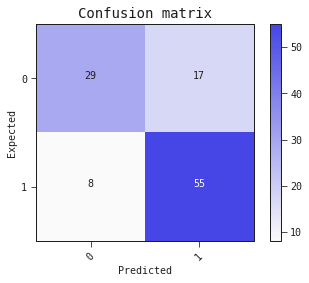

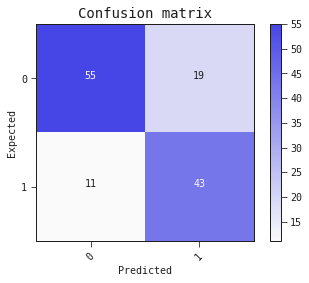

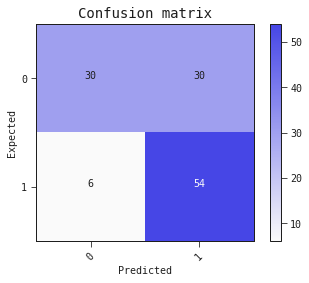

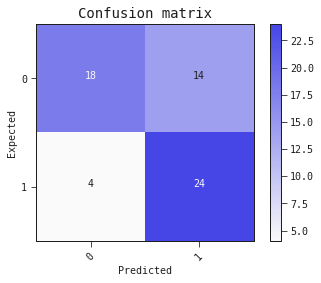

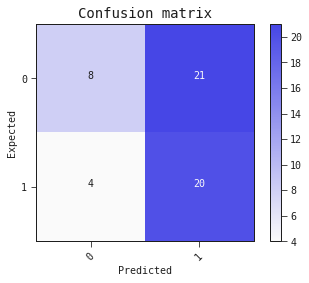

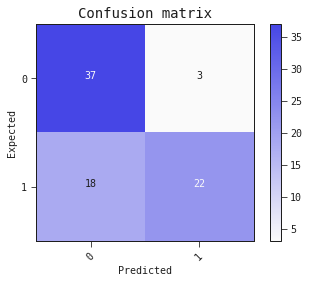

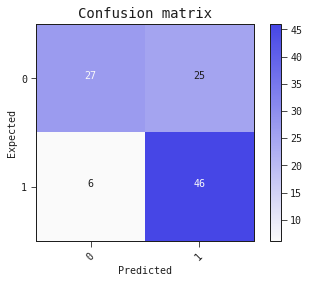

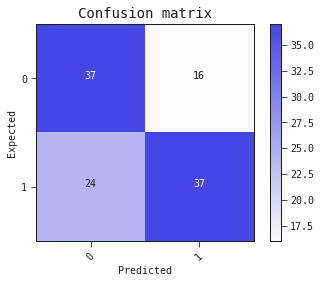

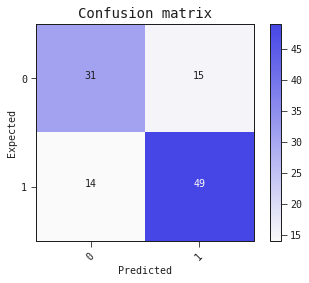

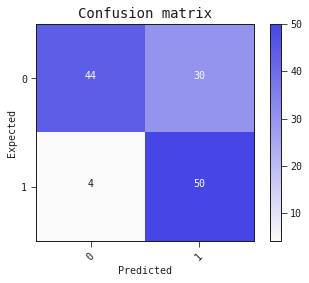

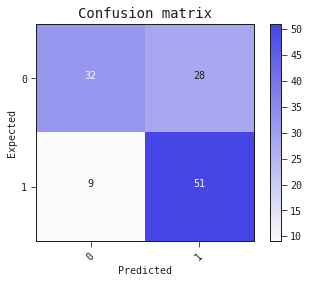

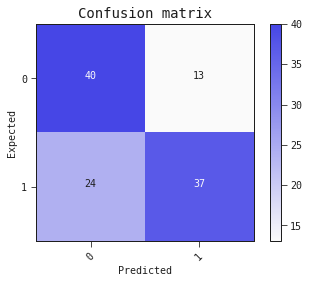

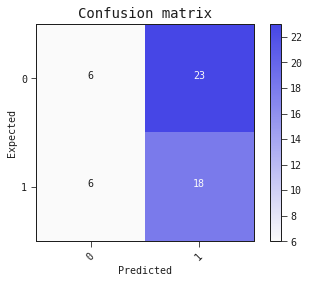

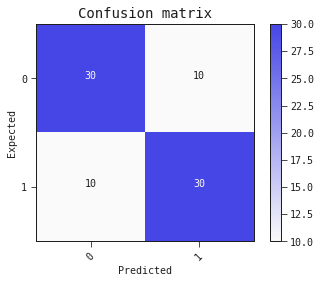

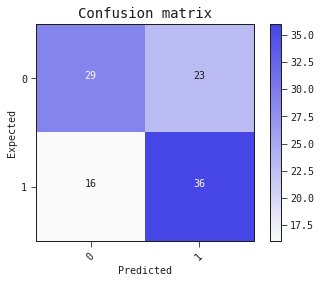

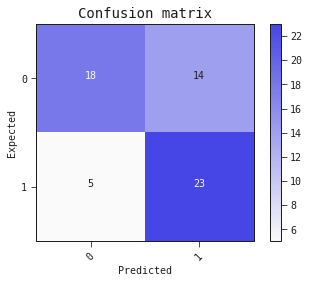

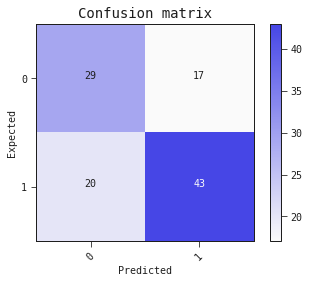

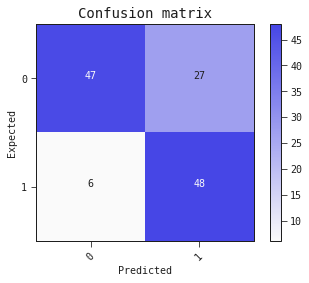

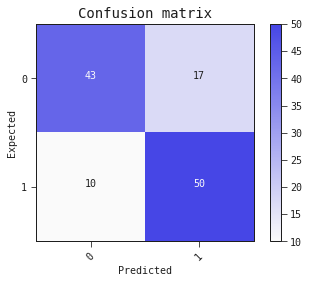

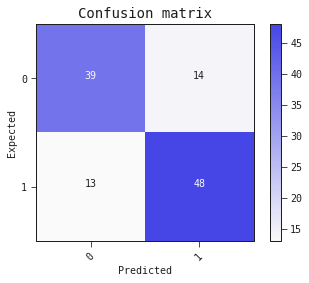

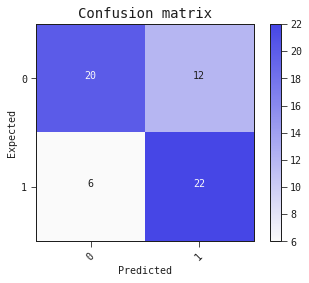

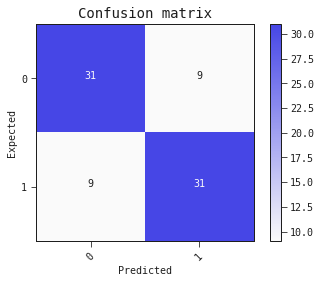

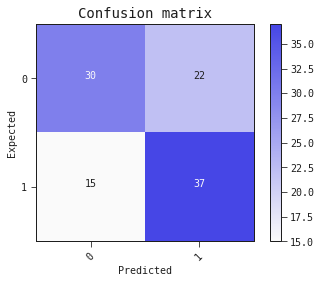

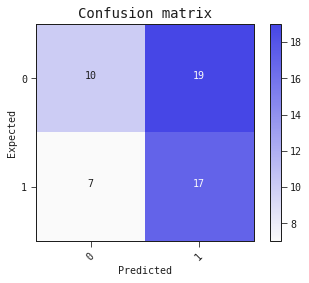

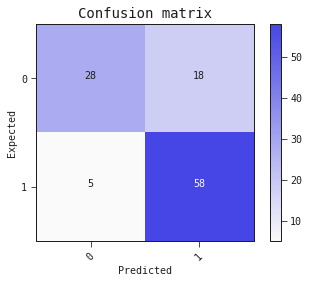

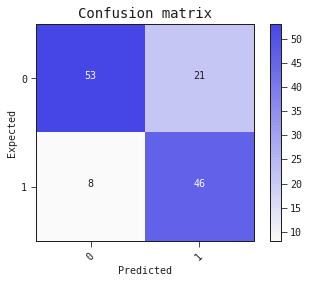

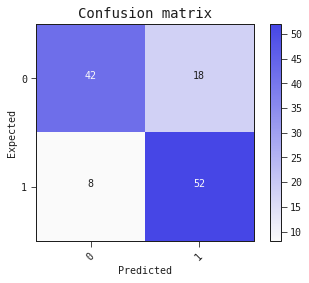

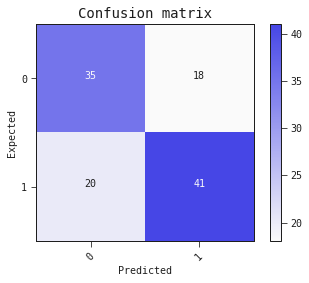

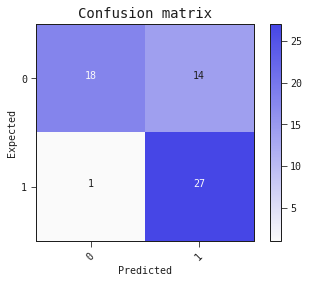

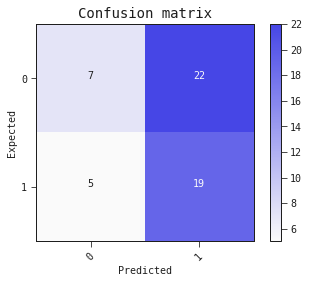

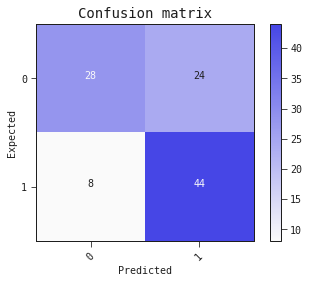

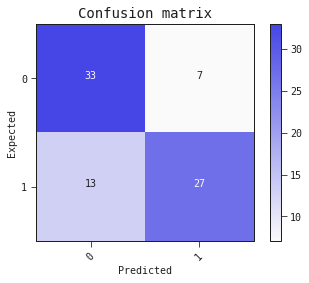

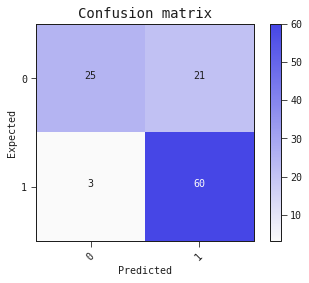

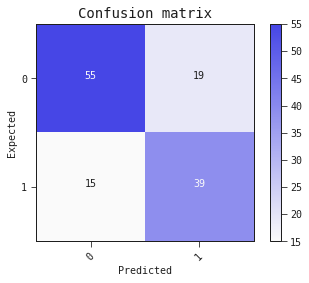

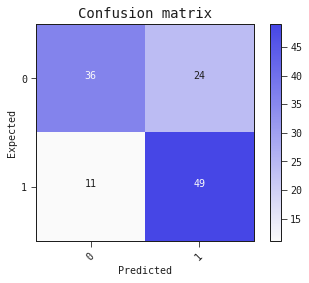

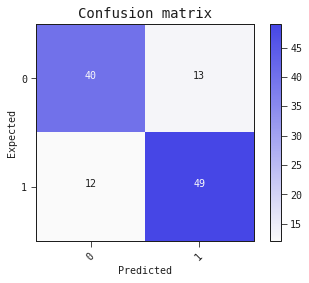

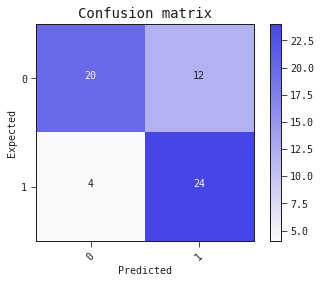

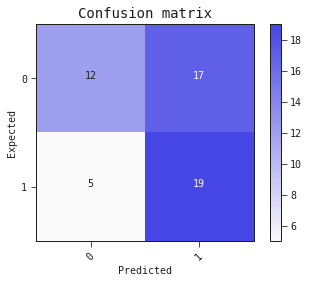

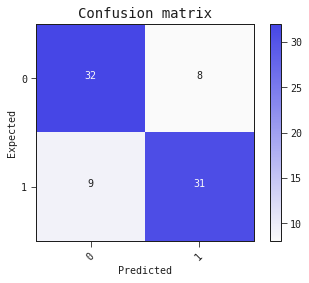

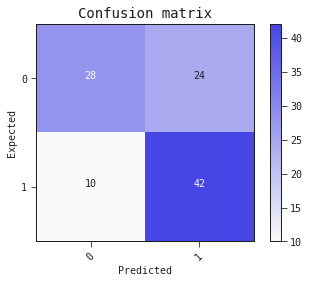

In [13]:
#indexing is fine, names are not??
grp = 0
for i in range(len(unique_groups)):
    outer_test_index = list(np.where(df["Country"]==unique_groups[i])[0])
#     print("OUTER TEST",unique_groups[i])
#     print("OUTER TEST",outer_test_index)
    
    inner_group_list = []
    inner_group_list.append(unique_groups[:i] + unique_groups[i+1:])
#     print(inner_group_list)
    
    outer_train_index = list(np.where(df["Country"]!=unique_groups[i])[0])
#     print("OUTER TRAIN",inner_group_list)
#     print("OUTER TRAIN",outer_train_index)
#     print("******************")
    
    #Training dataset
    outer_train_X = X.iloc[outer_train_index]
    outer_train_y = y[outer_train_index]
    
    #Test dataset
    outer_test_X =  X.iloc[outer_test_index]
    outer_test_y =  y[outer_test_index]
    
    for k,name in enumerate(inner_group_list[0]):
        inner_val_index = list(np.where(df["Country"]==name)[0])
#         print("INNER VALIDATION",inner_val_index)
#         print("INNER VALIDATION",name)
        
        inner_train_names = []
        inner_train_names.append(inner_group_list[:k] + inner_group_list[k+1:])
#         print(inner_train_names)
        
        inner_train_index = list(np.where((df["Country"]!=name) & (df["Country"]!=unique_groups[i]))[0])
#         print("INNER TRAIN",inner_train_index)
#         print("INNER TRAIN",inner_train_names)
#         print("########################")
    
        #Inner training dataset
        inner_train_X = X.iloc[inner_train_index]
        inner_train_y = y[inner_train_index]
        
        #Inner validation dataset
        inner_val_X =  X.iloc[inner_val_index]
        inner_val_y =  y[inner_val_index]
        
        
        
        # Feyn
        models = ql.auto_run(inner_train_X, output_name = 'condition', kind = 'classification', n_epochs=10)
        best = models[0]
        
        y_pred = best.predict(inner_val_X)

        RF_AUC_test_score = best.roc_auc_score(inner_val_X)

        #Adding auc to dataframe
        AUC_scores.at[unique_groups[i], name] = RF_AUC_test_score

        if show_fold_stats:
            print('-' * 80)
            print('Fold : %s'%(k+1),name)
            print('ROC AUC score for RandomForest model, validation set: %.4f'%RF_AUC_test_score)
#             print('F1 : %.4f, Recall : %.4f , Precision : %.4f'%(RF_f1_test, RF_recall_test, RF_precision_test))
            print(best.plot_confusion_matrix(inner_val_X))
            
    
    #Feyn on logo_test data
    models = ql.auto_run(outer_train_X, output_name = 'condition', kind = 'classification', n_epochs=50)
    best = models[0]
    
    y_pred = best.predict(outer_test_X)

    RF_AUC_test_score = best.roc_auc_score(outer_test_X)

    #Adding auc to dataframe
    AUC_scores.at[unique_groups[i], unique_groups[i]] = RF_AUC_test_score
    
    #Getting AUCROC data
    fpr, tpr, _ = roc_curve(outer_test_y,  y_pred)

    #Adding roc curve values to dataframe
    ROC_curve.at[unique_groups[i], "fpr"] = ",".join(str(x) for x in fpr)
    ROC_curve.at[unique_groups[i], "tpr"] = ",".join(str(x) for x in tpr)
    ROC_curve.at[unique_groups[i], "auc"] = RF_AUC_test_score
    

    if show_fold_stats:
        print('-' * 80)
        print('-' * 80)
        print('Group : %s'%(grp+1),unique_groups[i])
        print('ROC AUC score for RandomForest model, LOGO test set: %.4f'%RF_AUC_test_score)
    #         print('F1 : %.4f, Recall : %.4f , Precision : %.4f'%(RF_f1_test, RF_recall_test, RF_precision_test))
        print(best)
        print(best.plot_confusion_matrix(outer_test_X))
        print('-' * 80)
        print('-' * 80)
        grp += 1
        

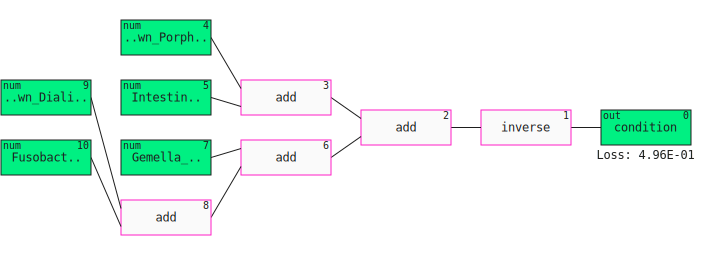

In [14]:
best

In [15]:
AUC_scores

,AT-CRC_species,CN-CRC_species,DE-CRC_species,FR-CRC_species,IT-CRC-2_species,IT-CRC_species,JP-CRC_species,US-CRC_species
AT-CRC_species,0.897516,0.732983,0.750833,0.732447,0.770089,0.586207,0.74375,0.681953
CN-CRC_species,0.899931,0.788539,0.719306,0.683266,0.793527,0.574713,0.79625,0.670118
DE-CRC_species,0.896308,0.819069,0.786944,0.74451,0.75279,0.682471,0.803437,0.667899
FR-CRC_species,0.851622,0.83471,0.789444,0.703526,0.774554,0.628592,0.8225,0.726701
IT-CRC-2_species,0.820221,0.802928,0.775556,0.795546,0.728795,0.648707,0.802812,0.701923
IT-CRC_species,0.802622,0.805681,0.821667,0.819827,0.717076,0.604885,0.812187,0.717086
JP-CRC_species,0.914251,0.808684,0.818056,0.72193,0.805804,0.577586,0.775625,0.724852
US-CRC_species,0.894928,0.79517,0.7975,0.841633,0.805804,0.58477,0.809687,0.71912


In [16]:
AUC_scores.to_csv("FEYN_AUC.csv")

In [17]:
import seaborn as sns

In [18]:
AUC_scores = AUC_scores.apply(pd.to_numeric, errors='coerce')

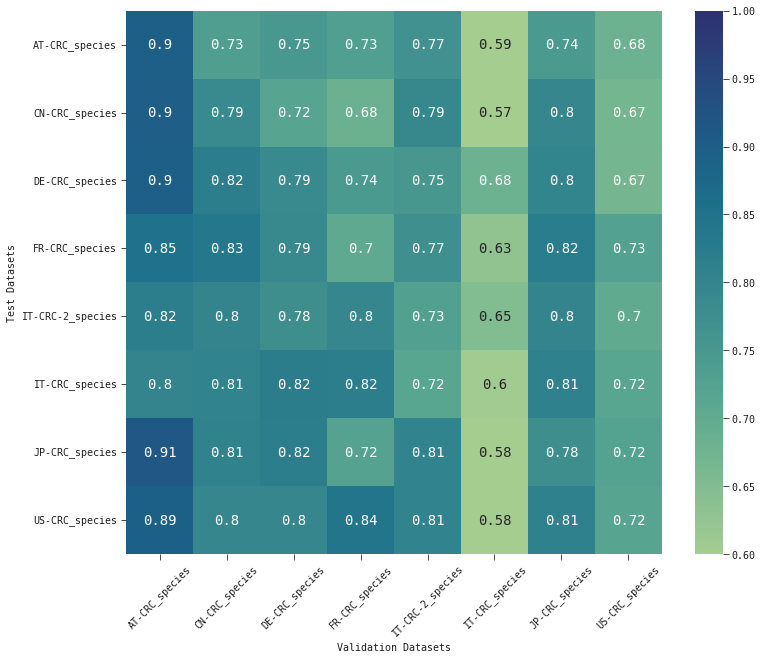

In [30]:
plt.figure(figsize=(12,10))
sns.set_palette("husl", 8)
ax = sns.heatmap(AUC_scores, annot = True, cmap="crest", vmin=0.6, vmax=1.0, annot_kws={"fontsize":14})
ax.set(xlabel="Validation Datasets", ylabel="Test Datasets")
ax.tick_params(axis='x', rotation=45)
# ax.xaxis.tick_top()
# ax.set(title = "AUC scores of Test and Validations Datasets")
plt.savefig("plots/LOSO_FEYN_1.jpg")
plt.show()

# ROC curves

In [20]:
ROC_curve

,fpr,tpr,auc
AT-CRC_species,"0.0,0.043478260869565216,0.043478260869565216,...","0.0,0.5396825396825397,0.5714285714285714,0.57...",0.897516
CN-CRC_species,"0.0,0.0,0.0,0.013513513513513514,0.01351351351...","0.0,0.018518518518518517,0.05555555555555555,0...",0.788539
DE-CRC_species,"0.0,0.08333333333333333,0.13333333333333333,0....","0.0,0.36666666666666664,0.36666666666666664,0....",0.786944
FR-CRC_species,"0.0,0.018867924528301886,0.018867924528301886,...","0.0,0.0,0.11475409836065574,0.1311475409836065...",0.703526
IT-CRC-2_species,"0.0,0.03125,0.0625,0.0625,0.125,0.125,0.1875,0...","0.0,0.21428571428571427,0.21428571428571427,0....",0.728795
IT-CRC_species,"0.0,0.06896551724137931,0.06896551724137931,0....","0.0,0.0,0.08333333333333333,0.0833333333333333...",0.604885
JP-CRC_species,"0.0,0.0,0.15,0.15,0.175,0.175,0.225,0.225,0.25...","0.0,0.025,0.575,0.625,0.625,0.675,0.675,0.7,0....",0.775625
US-CRC_species,"0.0,0.019230769230769232,0.07692307692307693,0...","0.0,0.1346153846153846,0.1346153846153846,0.21...",0.71912


In [21]:
ROC_curve.to_csv("FEYN_ROC.csv")

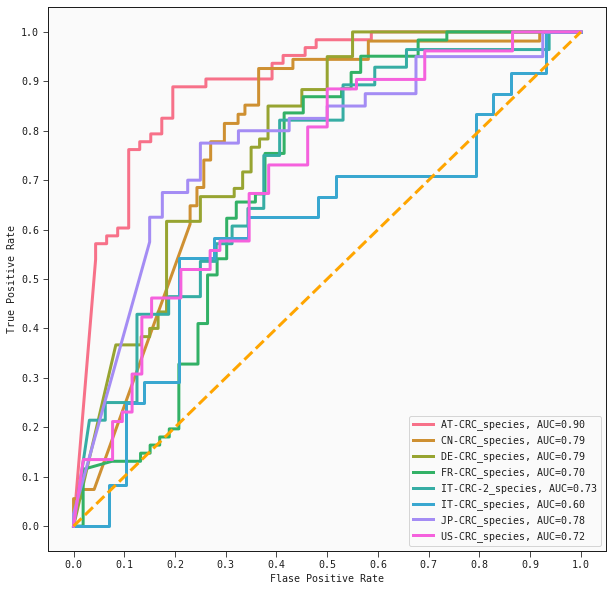

In [25]:
fig = plt.figure(figsize=(10,10))

for i in ROC_curve.index:
#     if aucroc.loc[i]['auc'] > 0.820:
    plt.plot([float(s) for s in ROC_curve.loc[i]['fpr'].split(",")], 
             [float(s) for s in ROC_curve.loc[i]['tpr'].split(",")], 
             label="{}, AUC={:.2f}".format(i, ROC_curve.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate")#, fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate")#, fontsize=15)

# plt.title('ROC Curve Analysis of Test Datasets', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.savefig("plots/LOSO_FEYN_2.jpg")
plt.show()
